## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

## Reading the Dataset

In [2]:
df=pd.read_csv('PEP1.csv')

## Understanding the Dataset

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Printing the shape of the dataframe

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking for null values

In [6]:
print(df.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Dropping the columns which can't be handled due to high missing values

In [7]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [8]:
print(100-(df['FireplaceQu'].isnull().sum()/len(df))*100)
print('So only 52% of the data is available. Since it is less than 70% we can drop it too')
df.drop('FireplaceQu',axis=1,inplace=True)

52.73972602739726
So only 52% of the data is available. Since it is less than 70% we can drop it too


### Identify variables with unique values

In [13]:
for i in df.columns:
    print (i , ":", df[i].unique())
    print (" _ "*40)
    print()

Id : [   1    2    3 ... 1458 1459 1460]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 

MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 

LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.

## Generate a separate dataset for numerical and categorical variables

In [14]:
df_numerical = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [15]:
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
df_numerical.shape

(1460, 38)

In [17]:
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [18]:
df_categorical.shape

(1460, 38)

In [19]:
df_numerical.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Missing value treatment

In [20]:
#You are facing that caveat because the slice/index of the dataframe is returning either a view, or a copy. This warning was created to flag "chained assignment" operations.

#You can suppress it by creating a deepcopy of the dataframe:

df_numerical = df_numerical.copy(deep=True)
df_numerical['LotFrontage'].fillna(df_numerical['LotFrontage'].mean(),inplace=True)
df_numerical['GarageYrBlt'].fillna(df_numerical['GarageYrBlt'].mean(),inplace=True)
df_numerical['MasVnrArea'].fillna(df_numerical['MasVnrArea'].mean(),inplace=True)

In [21]:
df_numerical.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### Identify the skewness and distribution

Id
Skew value: 0.0


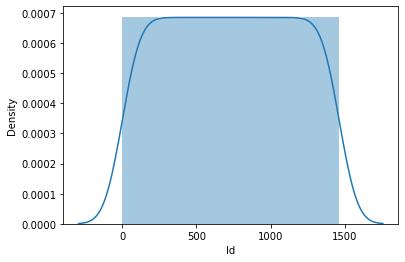

MSSubClass
Skew value: 1.4062101115313512


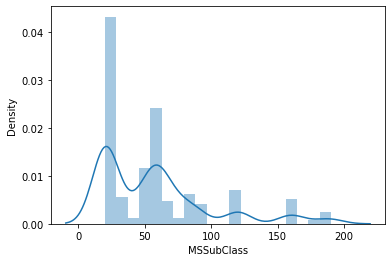

LotFrontage
Skew value: 2.382499177054863


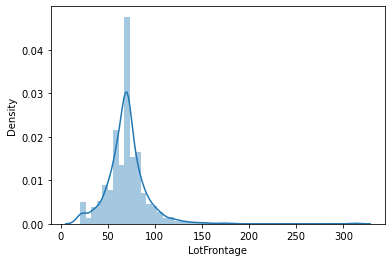

LotArea
Skew value: 12.195142125084478


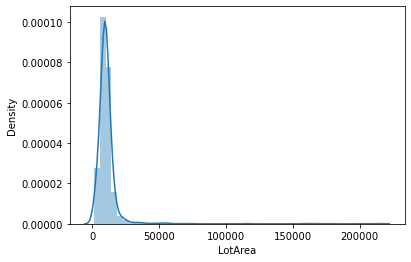

OverallQual
Skew value: 0.2167209765258641


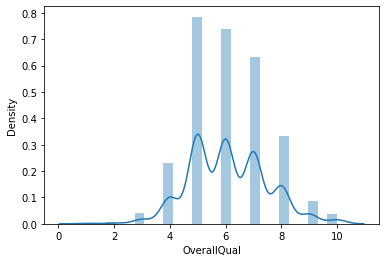

OverallCond
Skew value: 0.6923552135520978


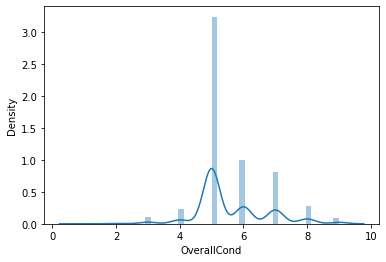

YearBuilt
Skew value: -0.612830724202899


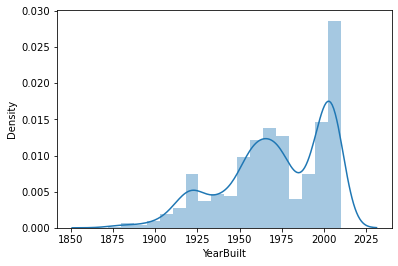

YearRemodAdd
Skew value: -0.5030444967597948


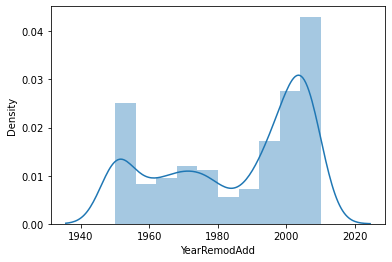

MasVnrArea
Skew value: 2.6736612614758912


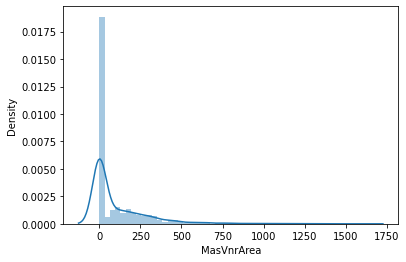

BsmtFinSF1
Skew value: 1.6837708962341815


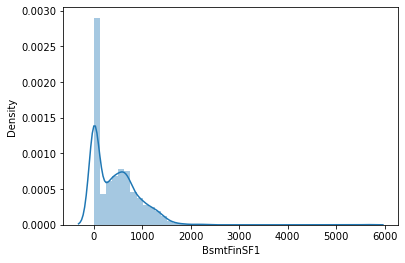

BsmtFinSF2
Skew value: 4.250888017057445


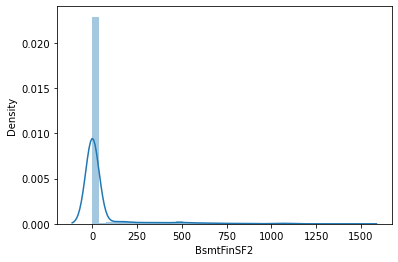

BsmtUnfSF
Skew value: 0.9193227015582005


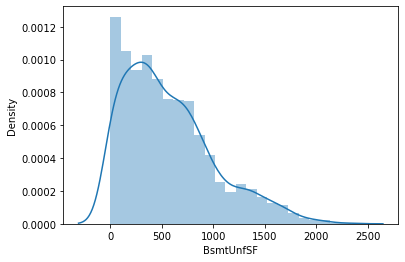

TotalBsmtSF
Skew value: 1.522688086978629


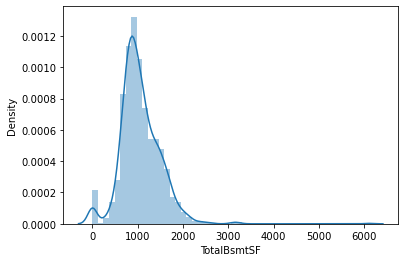

1stFlrSF
Skew value: 1.3753417421837937


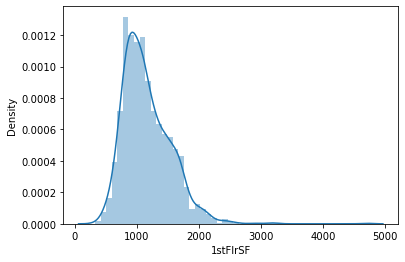

2ndFlrSF
Skew value: 0.8121942731961613


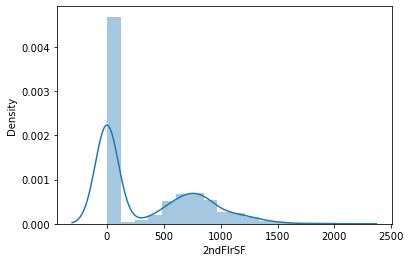

LowQualFinSF
Skew value: 9.002080417658552


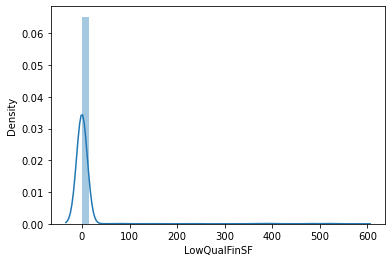

GrLivArea
Skew value: 1.365155954773434


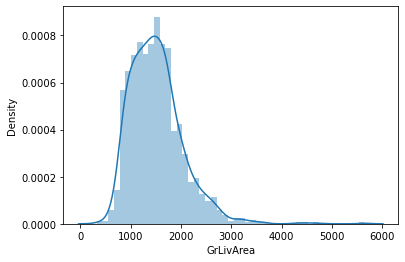

BsmtFullBath
Skew value: 0.5954540376067279


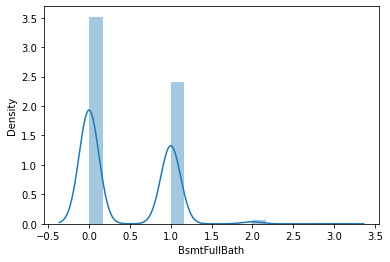

BsmtHalfBath
Skew value: 4.0991856695420035


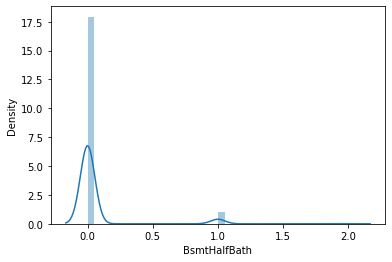

FullBath
Skew value: 0.0365239844325461


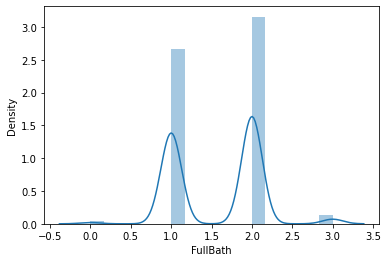

HalfBath
Skew value: 0.6752028347742616


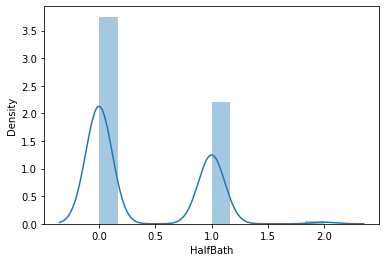

BedroomAbvGr
Skew value: 0.21157244158228097


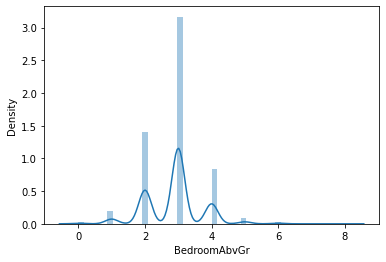

KitchebvGr
Skew value: 4.483784093860484


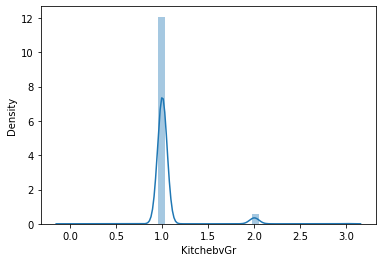

TotRmsAbvGrd
Skew value: 0.6756457673102017


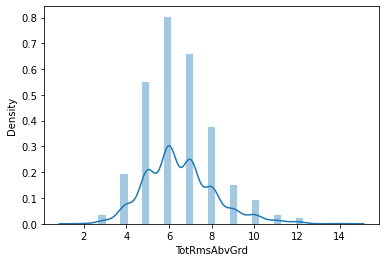

Fireplaces
Skew value: 0.6488976310170327


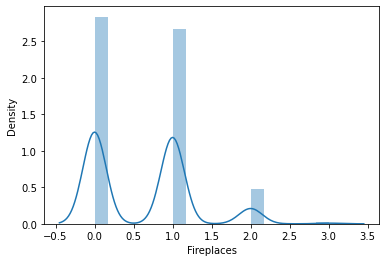

GarageYrBlt
Skew value: -0.6674881457666015


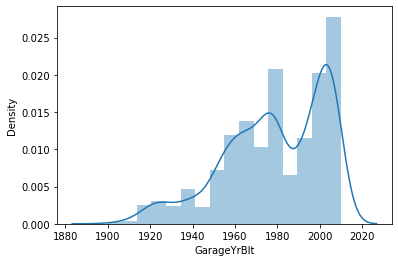

GarageCars
Skew value: -0.34219689543081294


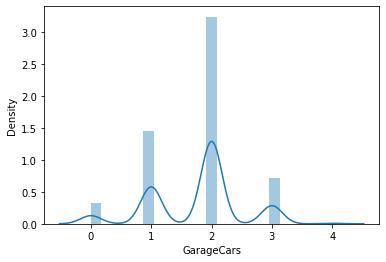

GarageArea
Skew value: 0.1797959420587727


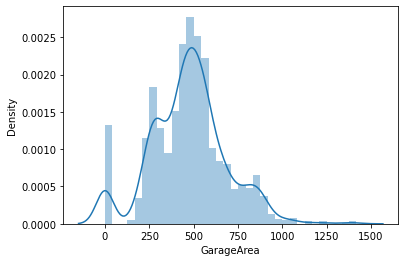

WoodDeckSF
Skew value: 1.5397916998042025


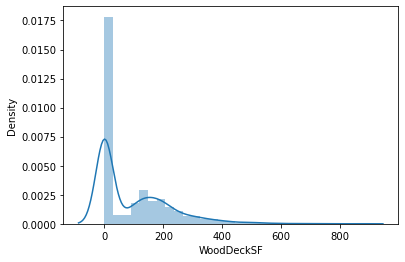

OpenPorchSF
Skew value: 2.361911928568972


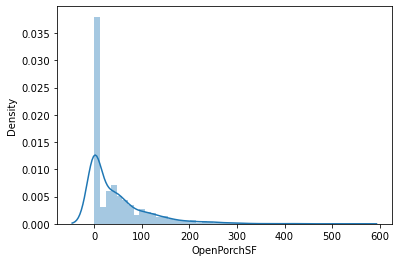

EnclosedPorch
Skew value: 3.086696471376678


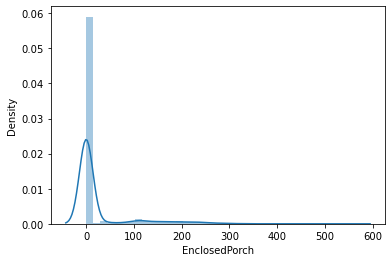

3SsnPorch
Skew value: 10.293752357165413


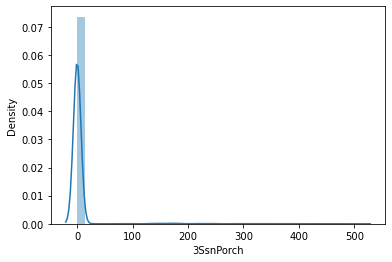

ScreenPorch
Skew value: 4.1179773827954875


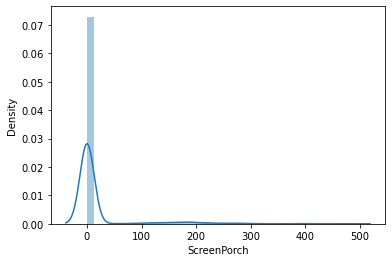

PoolArea
Skew value: 14.813134660429398


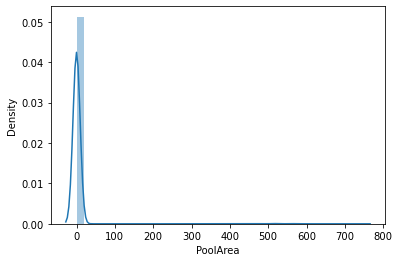

MiscVal
Skew value: 24.4516396173223


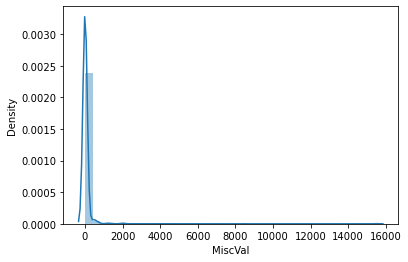

MoSold
Skew value: 0.2118350601903434


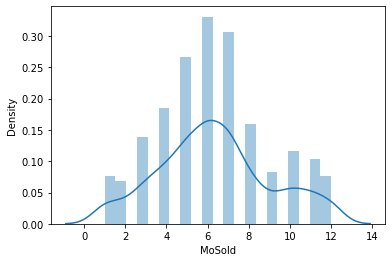

YrSold
Skew value: 0.096169579618143


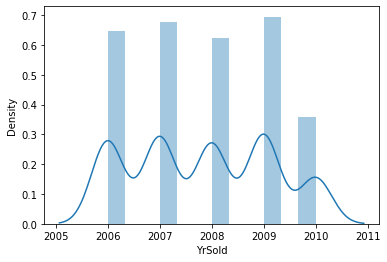

SalePrice
Skew value: 1.880940746034036


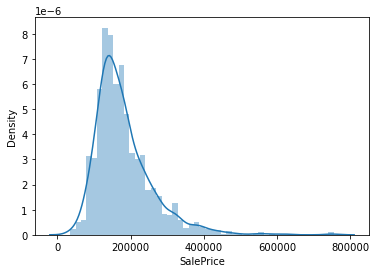

In [22]:
for col in df_numerical:
    print(col)
    print('Skew value:',skew(df_numerical[col]))
    
    sns.distplot(df_numerical[col])
    plt.show()

### Identify significant variables using a correlation matrix 

<AxesSubplot:>

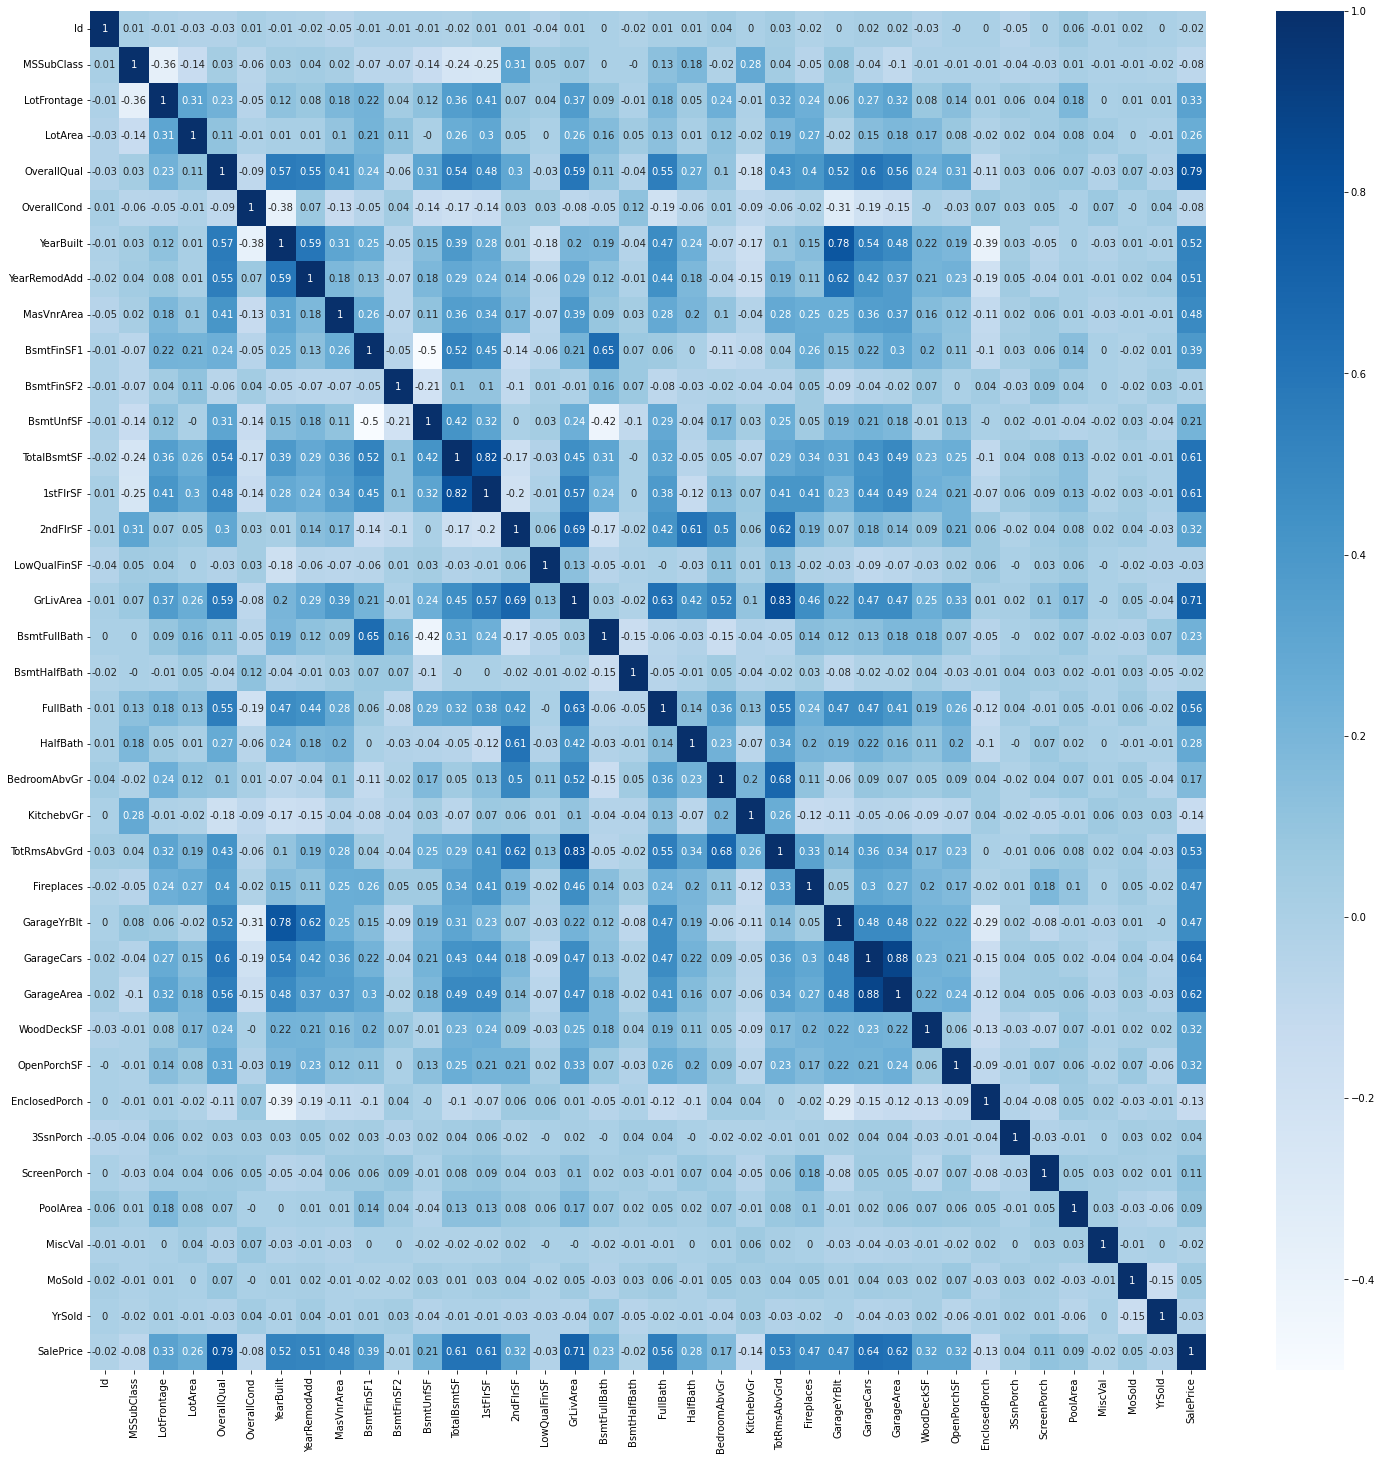

In [23]:
plt.figure(figsize=(25,25))
sns.heatmap(df_numerical.corr().round(2),annot=True,cmap='Blues')

In [59]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                #colname = corr_matrix.columns[i]  # getting the name of column
                colname_1 = corr_matrix.columns[j]
                #col_corr.add(colname)
                col_corr.add(colname_1)
    return col_corr

In [72]:
numeric_corr_features = correlation(df_numerical, 0.7)
len(set(numeric_corr_features))

5

In [74]:
numeric_corr_features=list(numeric_corr_features)
numeric_corr_features.append('SalePrice')

In [75]:
numeric_corr_features

['YearBuilt',
 'TotalBsmtSF',
 'OverallQual',
 'GarageCars',
 'GrLivArea',
 'SalePrice']

### Pair plot for distribution and density

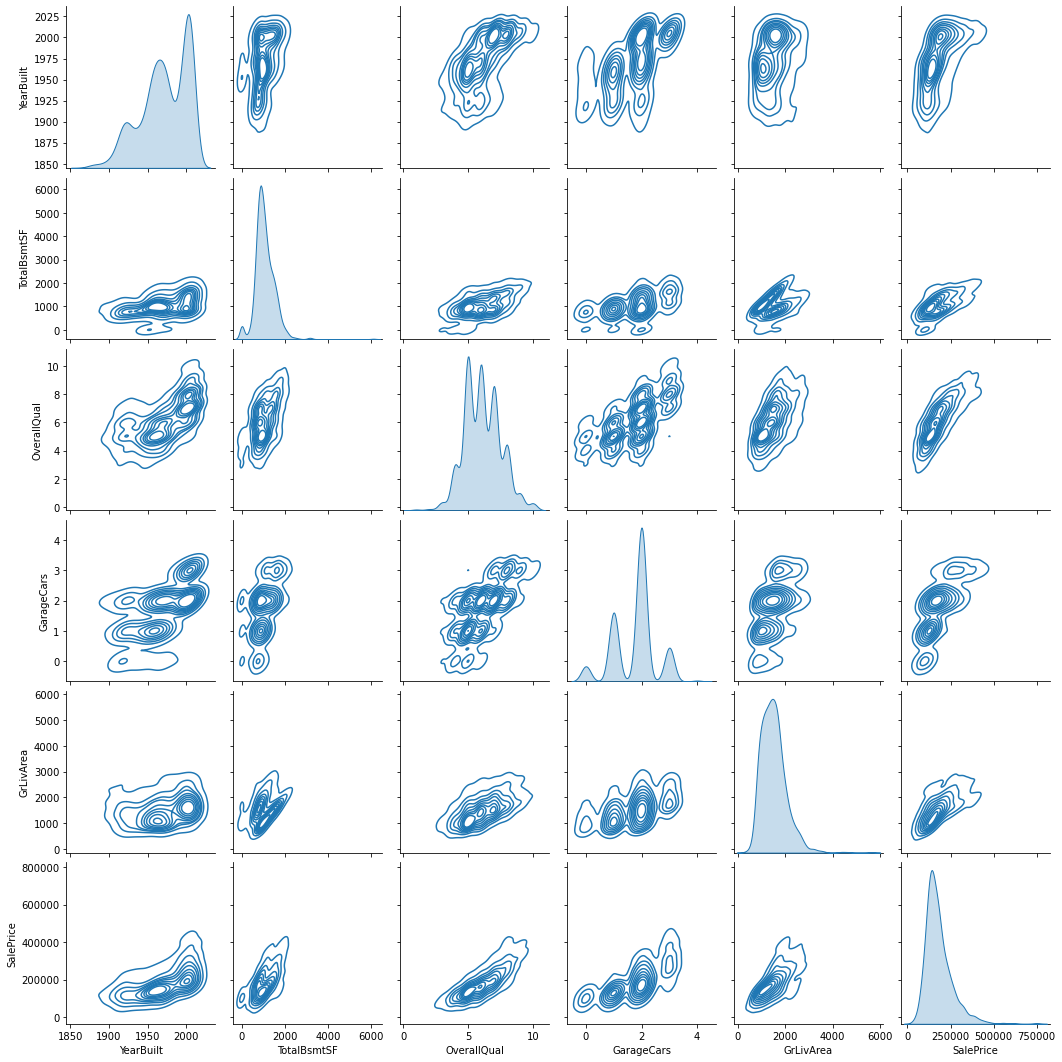

In [76]:
sns.pairplot(df_numerical[numeric_corr_features], kind="kde")

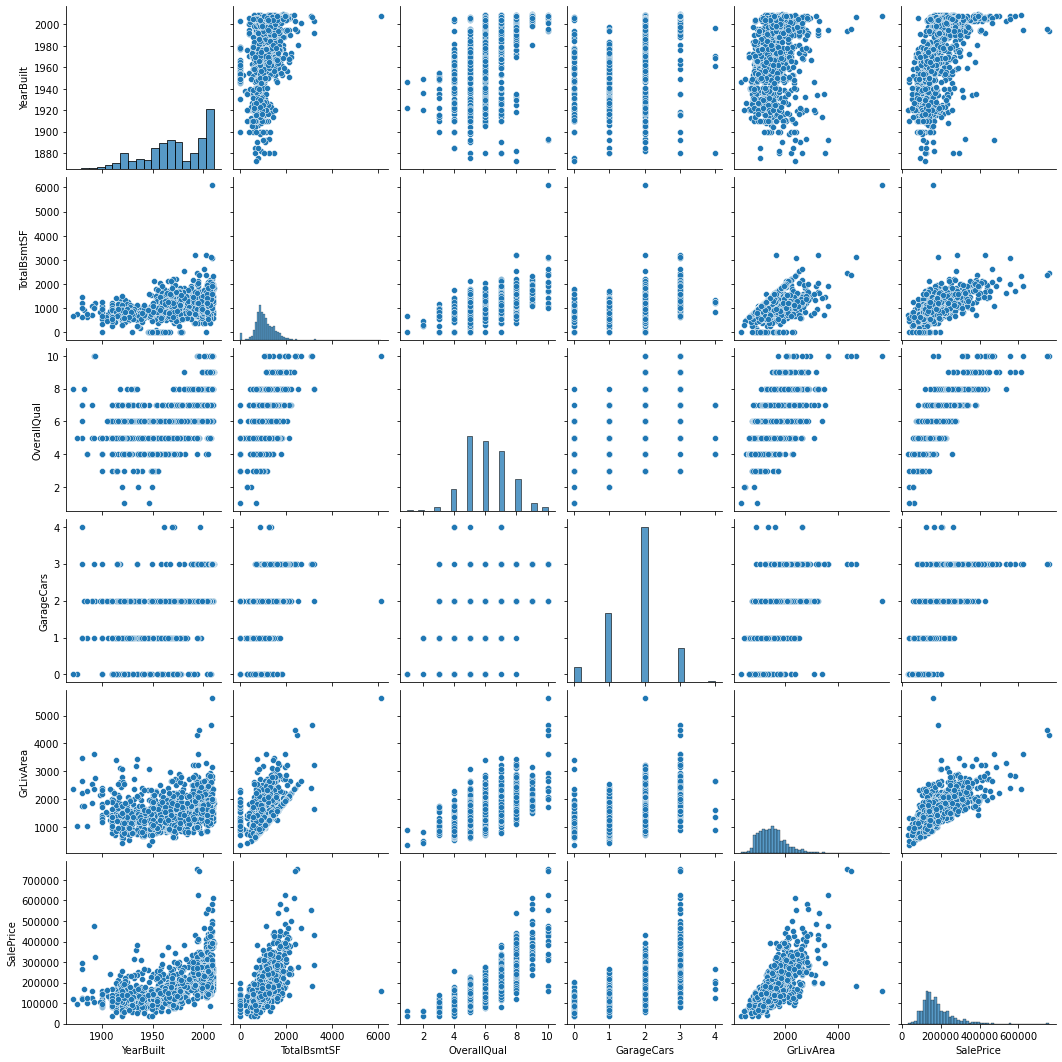

In [77]:
sns.pairplot(df_numerical[numeric_corr_features], diag_kind="hist")

### Missing value treatment for categorical

In [78]:
df_categorical.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functiol          0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [79]:
df_categorical=df_categorical.fillna(df_categorical.mode().iloc[0])

In [80]:
df_categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

### Count plot and box plot for bivariate analysis

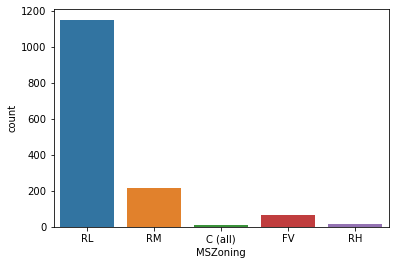

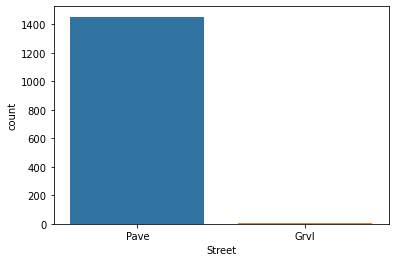

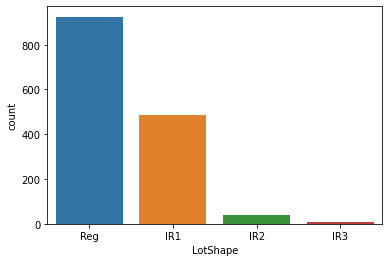

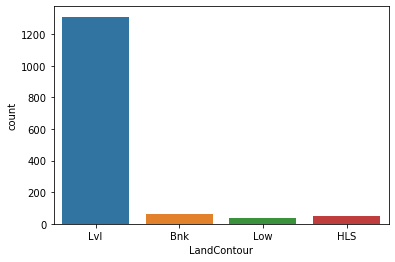

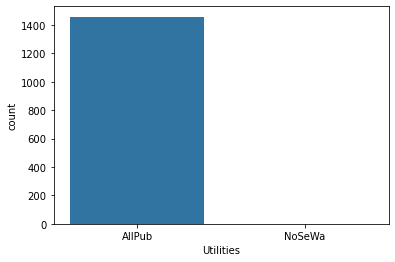

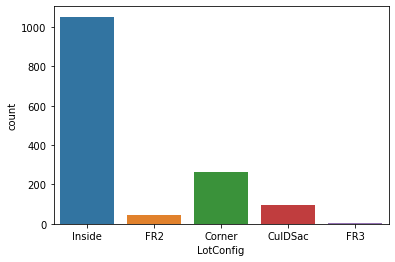

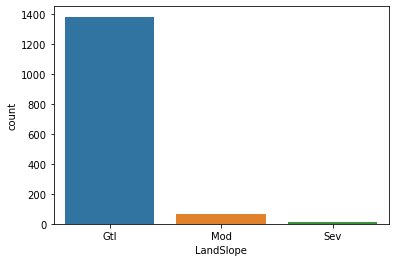

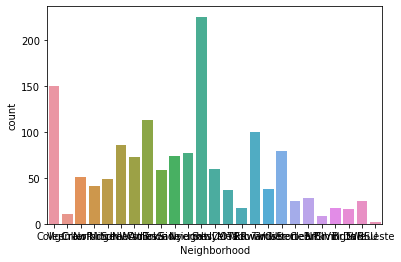

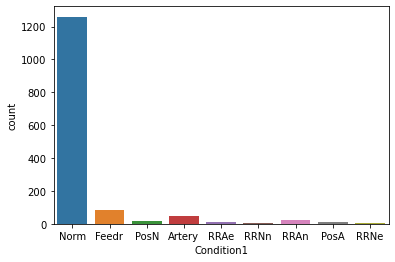

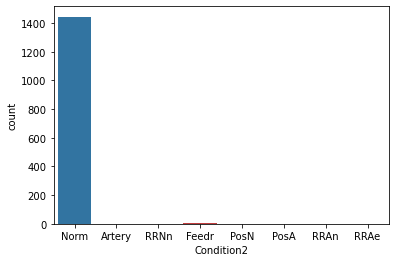

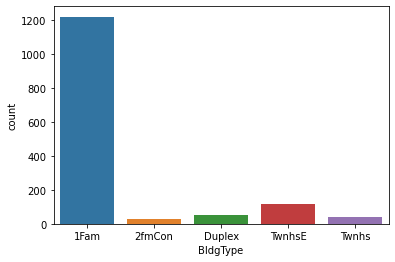

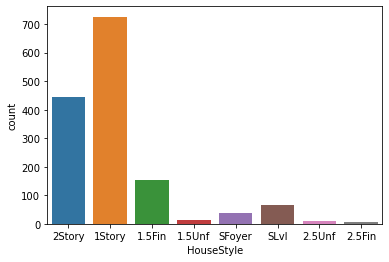

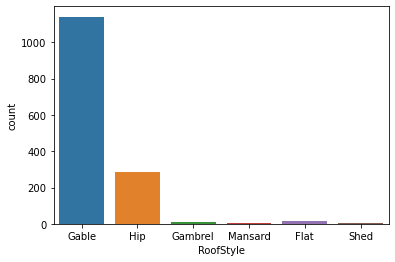

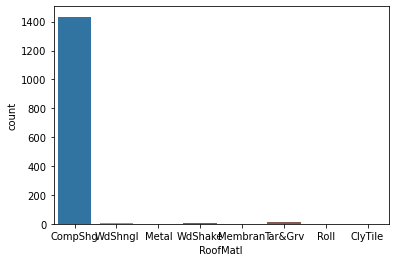

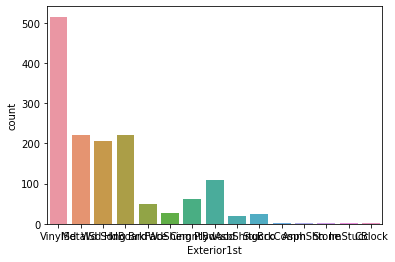

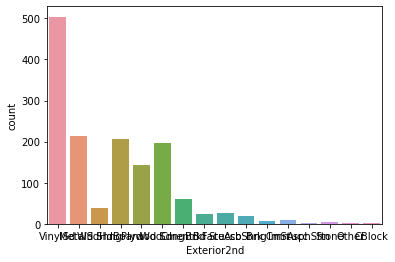

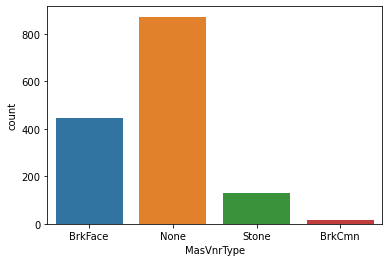

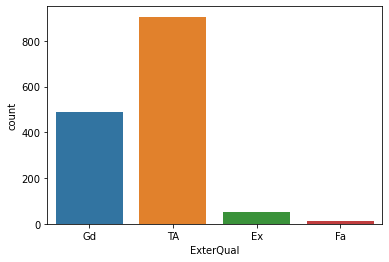

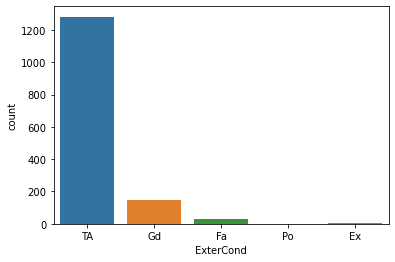

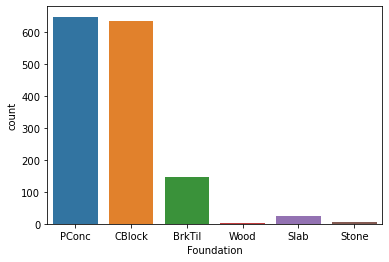

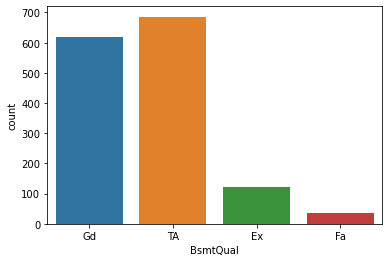

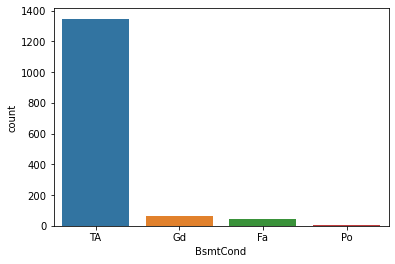

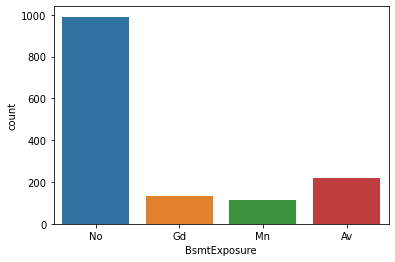

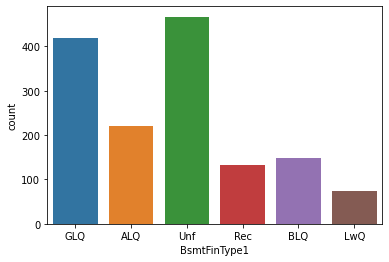

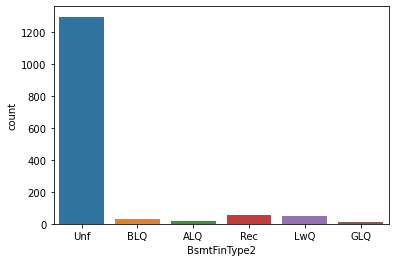

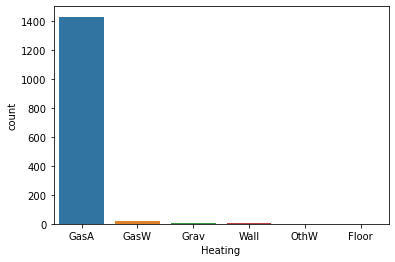

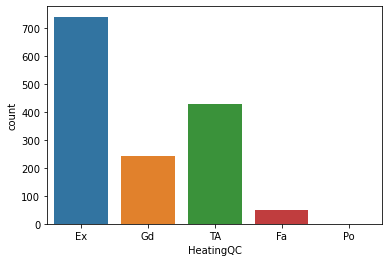

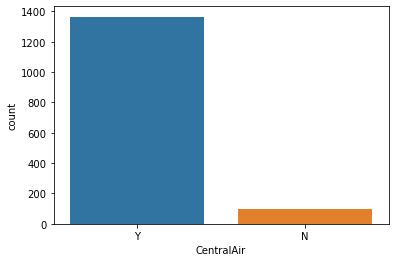

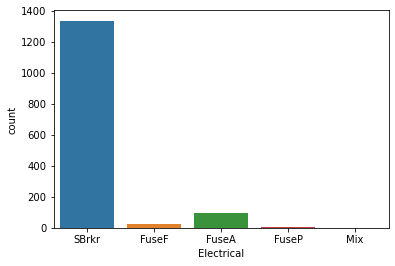

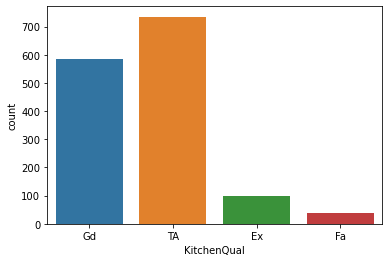

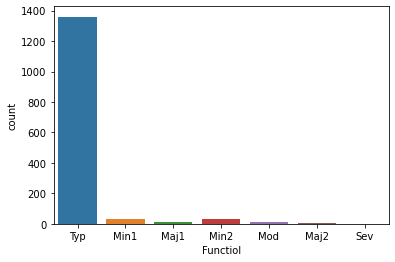

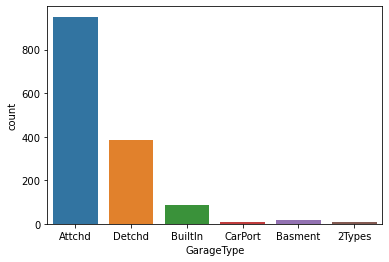

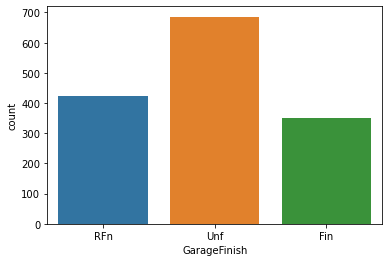

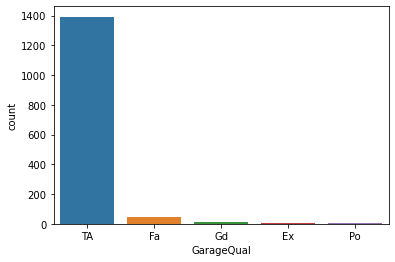

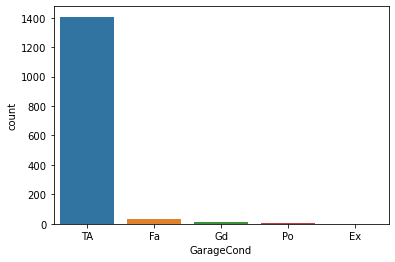

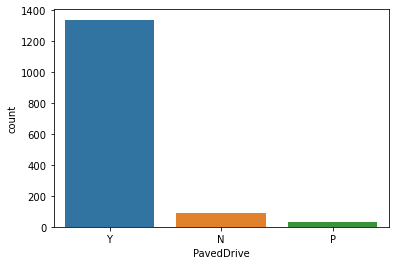

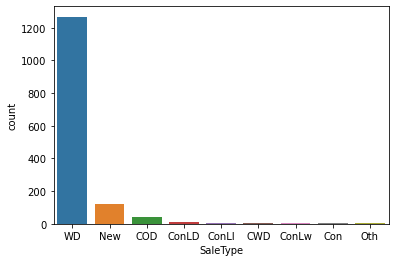

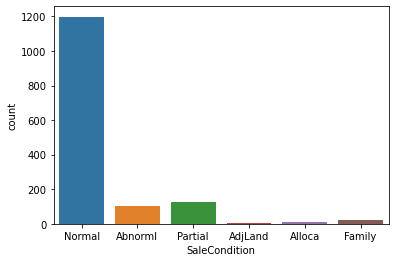

In [81]:
for i in df_categorical:
    sns.countplot(data=df_categorical,x=i)
    plt.show()

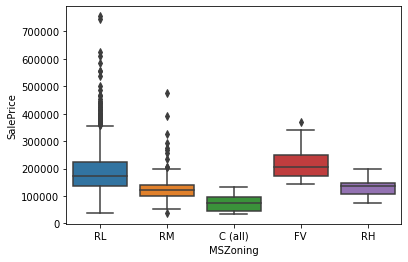

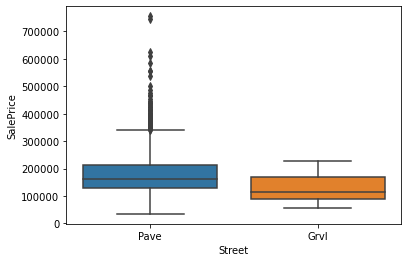

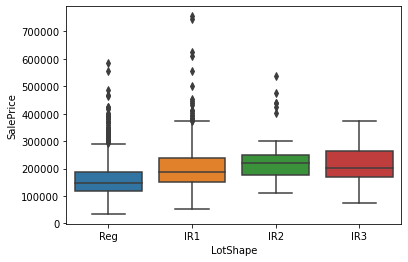

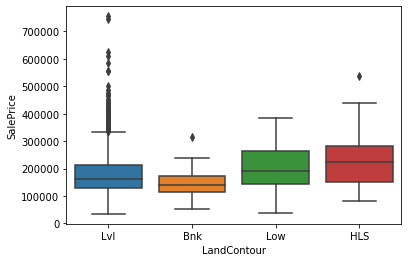

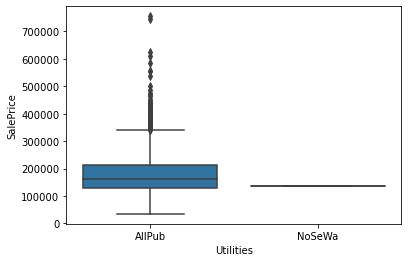

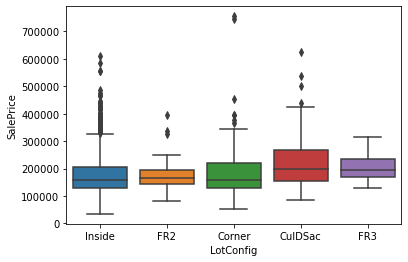

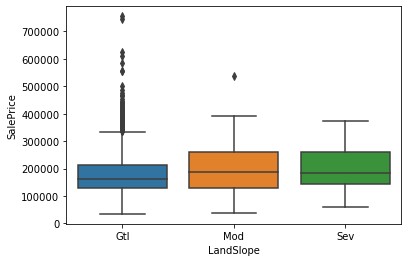

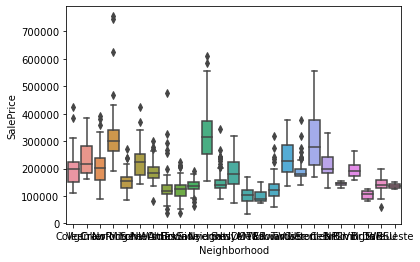

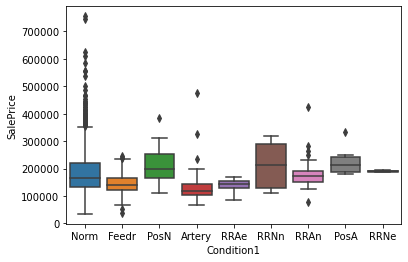

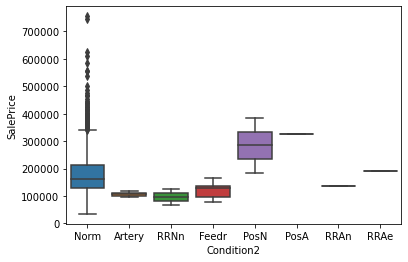

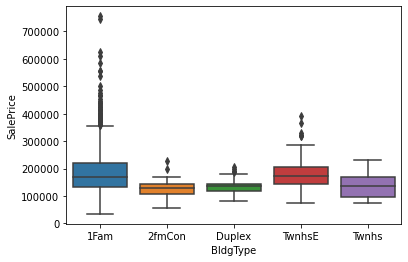

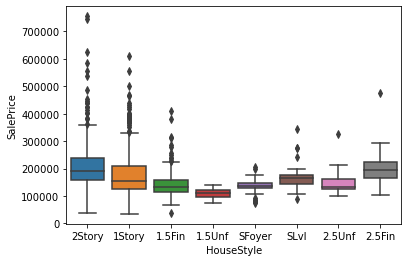

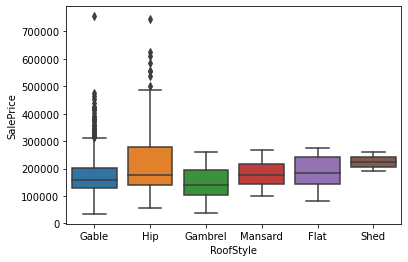

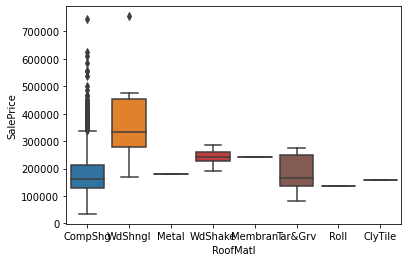

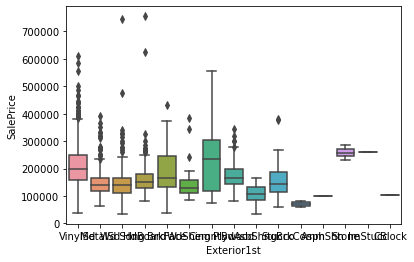

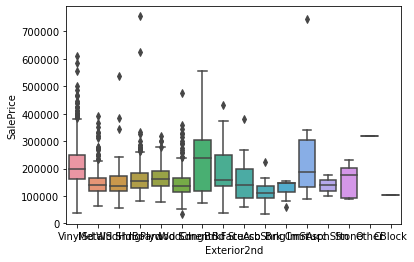

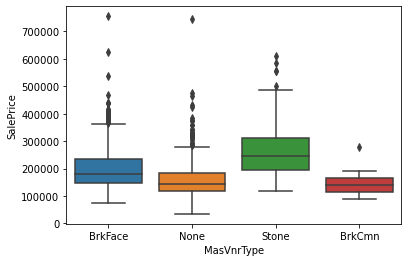

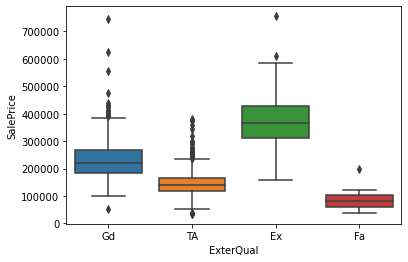

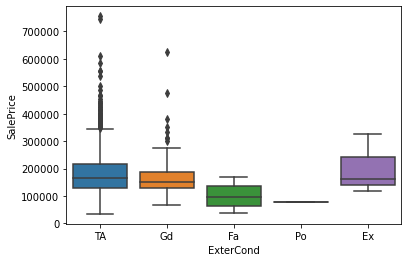

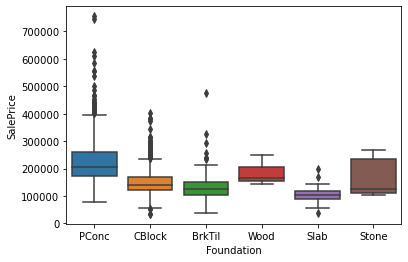

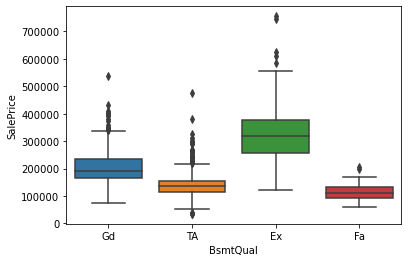

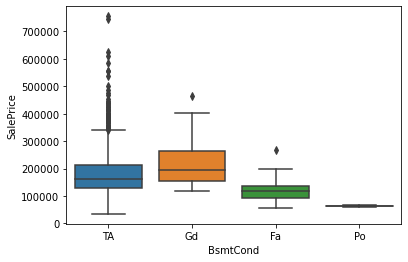

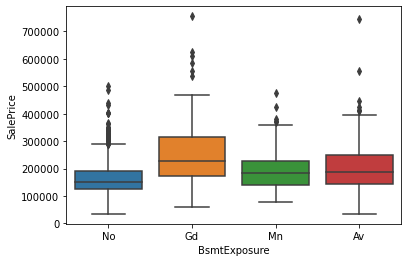

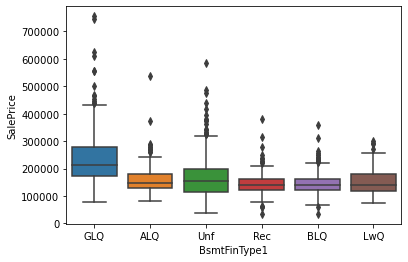

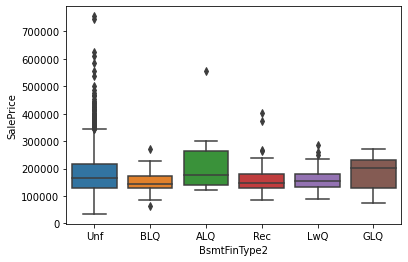

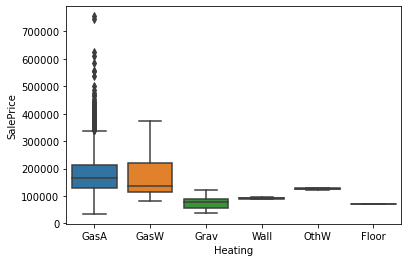

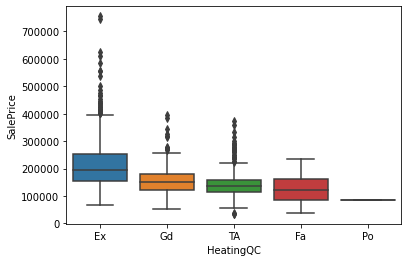

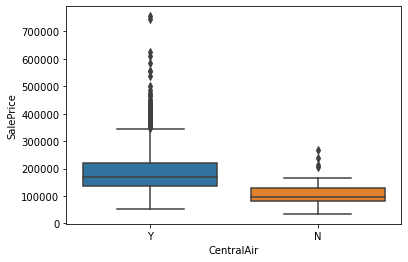

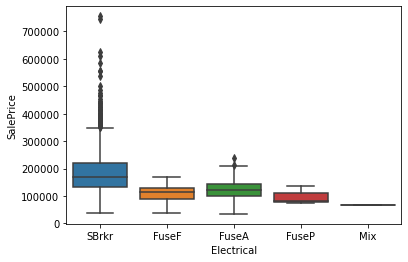

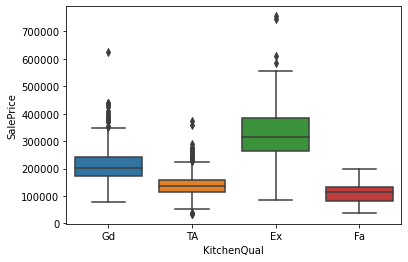

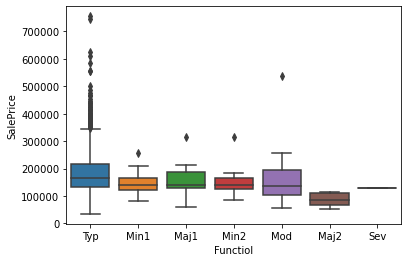

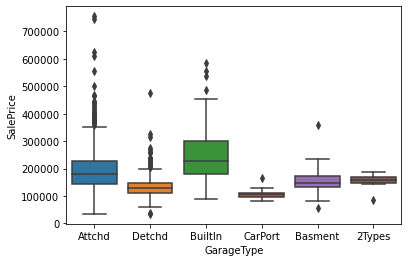

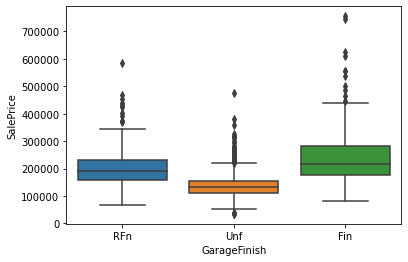

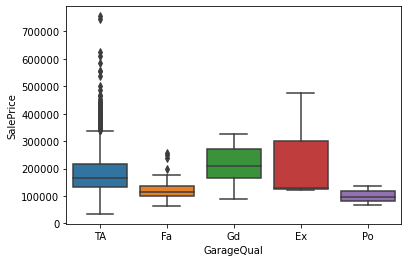

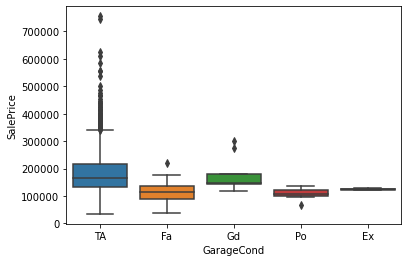

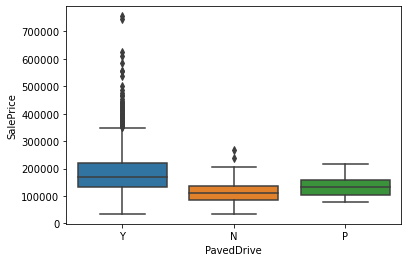

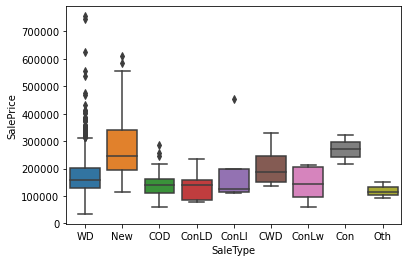

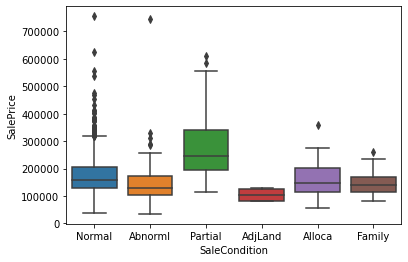

In [83]:
for i in df_categorical:
    sns.boxplot(x=df_categorical[i],y=df_numerical['SalePrice'])
    plt.show()

In [103]:
df_categorical=df_categorical.join(df_numerical['SalePrice'])

In [104]:
df_categorical.head()

,MSZoning,Street,LotShape,LotConfig,Neighborhood,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,GarageFinish,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,TA,No,GasA,Y,Gd,RFn,WD,Normal,208500
1,RL,Pave,Reg,FR2,Veenker,None,TA,TA,CBlock,Gd,TA,Gd,GasA,Y,TA,RFn,WD,Normal,181500
2,RL,Pave,IR1,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GasA,Y,Gd,RFn,WD,Normal,223500
3,RL,Pave,IR1,Corner,Crawfor,None,TA,TA,BrkTil,TA,Gd,No,GasA,Y,Gd,Unf,WD,Abnorml,140000
4,RL,Pave,IR1,FR2,NoRidge,BrkFace,Gd,TA,PConc,Gd,TA,Av,GasA,Y,Gd,RFn,WD,Normal,250000


### Identify significant variables using p-values and Chi-Square values

In [84]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
#Function to determine p-value and perform chi-square test
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi-square Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None

#Function to print the results of p-value and chi-square test     
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
#Function to determine chi-square and p-value less than or equal to 0.05
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [95]:
cT = ChiSquare(df_categorical)

testColumns=df_categorical.columns.to_list()
for var in testColumns:
    cT.TestIndependence(colX=var,colY="SalePrice" )

MSZoning is IMPORTANT for Prediction
Street is IMPORTANT for Prediction
LotShape is IMPORTANT for Prediction
LandContour is NOT an important predictor. (Discard LandContour from model)
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is IMPORTANT for Prediction
LandSlope is NOT an important predictor. (Discard LandSlope from model)
Neighborhood is IMPORTANT for Prediction
Condition1 is NOT an important predictor. (Discard Condition1 from model)
Condition2 is NOT an important predictor. (Discard Condition2 from model)
BldgType is NOT an important predictor. (Discard BldgType from model)
HouseStyle is NOT an important predictor. (Discard HouseStyle from model)
RoofStyle is NOT an important predictor. (Discard RoofStyle from model)
RoofMatl is NOT an important predictor. (Discard RoofMatl from model)
Exterior1st is NOT an important predictor. (Discard Exterior1st from model)
Exterior2nd is NOT an important predictor. (Discard Exterior2nd from model)
MasVnr

In [96]:
df_numerical=df_numerical[numeric_corr_features]

In [105]:
df_categorical=df_categorical[['MSZoning','Street','LotShape','LotConfig','Neighborhood','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','Heating','CentralAir','KitchenQual','GarageFinish','SaleType','SaleCondition','SalePrice']]

## Combine all the significant categorical and numerical variables

In [107]:
#Combining the datasets
final_df = pd.merge(df_categorical,df_numerical, how="outer", on=["SalePrice"])

In [108]:
final_df

,MSZoning,Street,LotShape,LotConfig,Neighborhood,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,...,KitchenQual,GarageFinish,SaleType,SaleCondition,SalePrice,YearBuilt,TotalBsmtSF,OverallQual,GarageCars,GrLivArea
0,RL,Pave,Reg,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,...,Gd,RFn,WD,Normal,208500,2003,856,7,2,1710
1,RL,Pave,Reg,FR2,Veenker,None,TA,TA,CBlock,Gd,...,TA,RFn,WD,Normal,181500,1976,1262,6,2,1262
2,RL,Pave,IR1,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,...,Gd,RFn,WD,Normal,223500,2001,920,7,2,1786
3,RL,Pave,IR1,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,...,Gd,RFn,WD,Normal,223500,1923,1324,5,2,1576
4,RL,Pave,Reg,Inside,BrkSide,None,TA,TA,CBlock,TA,...,Gd,RFn,WD,Normal,223500,2001,920,7,2,1786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,RM,Pave,Reg,Inside,MeadowV,None,TA,TA,CBlock,Gd,...,Ex,Unf,WD,Abnorml,92000,1970,630,5,0,630
6766,RL,Pave,Reg,Inside,Somerst,Stone,Gd,TA,PConc,Gd,...,Ex,Fin,New,Partial,287090,2008,1573,8,3,1578
6767,RL,Pave,Reg,Inside,Crawfor,None,Ex,Gd,Stone,TA,...,Gd,RFn,WD,Normal,266500,1941,1152,7,1,2340
6768,RL,Pave,Reg,Inside,mes,None,TA,TA,CBlock,TA,...,Gd,Unf,WD,Normal,142125,1950,1078,5,1,1078


In [109]:
final_df.shape

(6770, 24)

## Plot box plot for the new dataset to find the variables with outliers

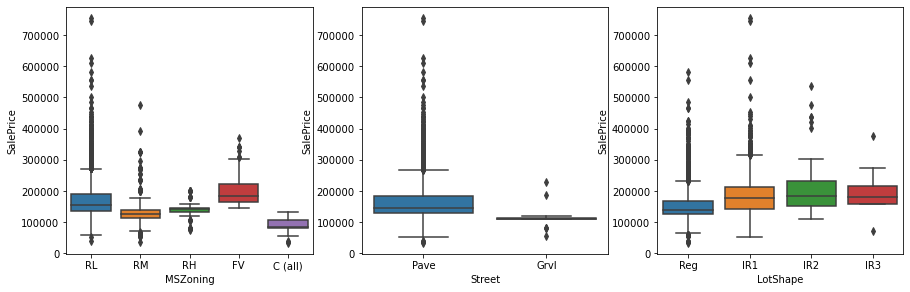

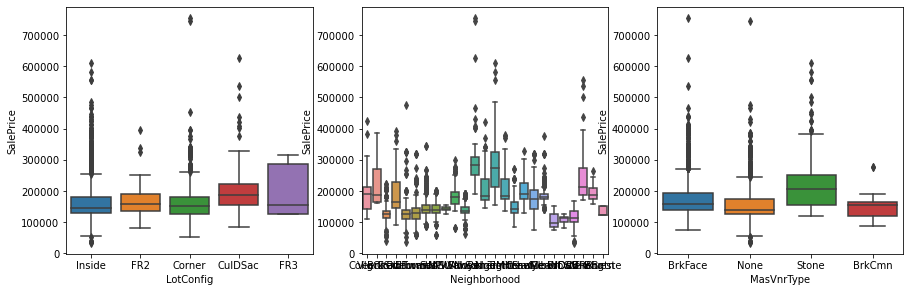

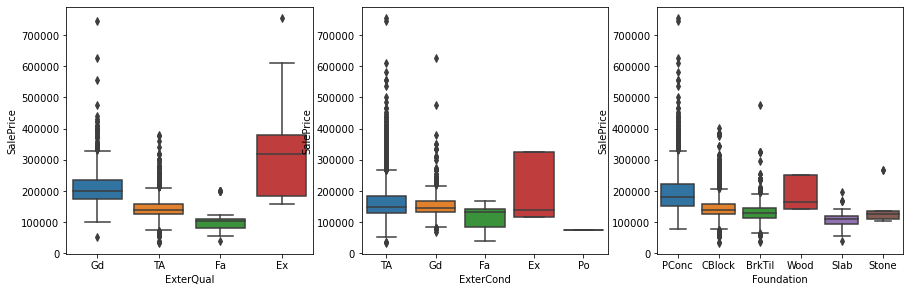

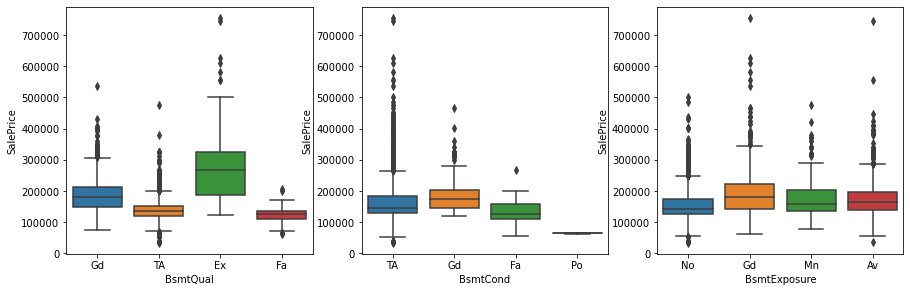

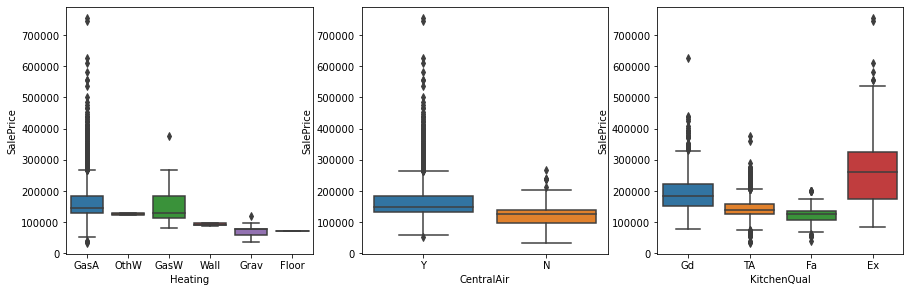

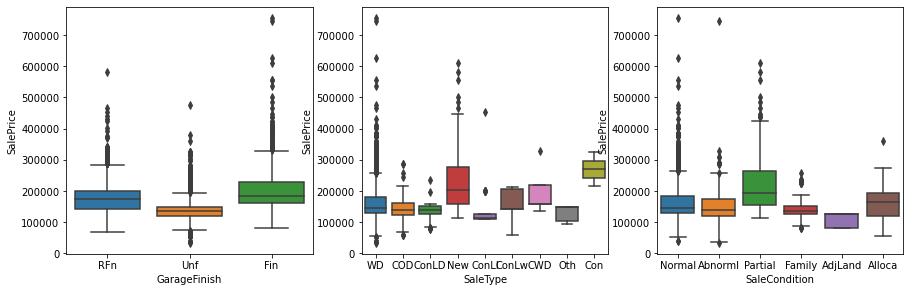

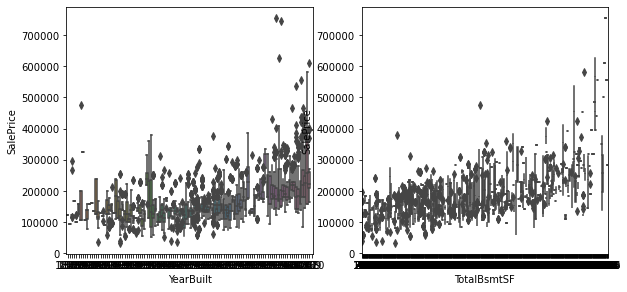

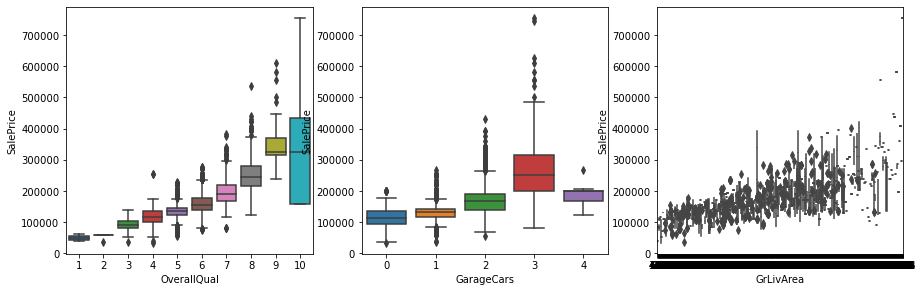

<Figure size 1080x720 with 0 Axes>

In [111]:
#Function to plot all independent categorical variables with SalePrice and count plot
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(final_df.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=final_df, x=c, y='SalePrice', ax=ax2) #for boxplot
                        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1